# خوارزمية Apriori

استخراج قواعد الارتباط من بيانات المبيعات

## استيراد المكتبات المطلوبة

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# تعيين نمط seaborn
sns.set_style('whitegrid')
# تعيين حجم الرسومات
plt.rcParams['figure.figsize'] = (12, 8)

## تحميل البيانات المعالجة

In [3]:
# تحميل البيانات المعالجة
df = pd.read_csv('../data/processed/sales_data_processed_20250122_052318.csv')
df.head()

,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit,Year,Month,Quarter,Sales_Category
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490,2020,1,1,Low
1,2020-01-02,Furniture,South,Home Office,556.867561,6,0.191294,37.407146,2020,1,1,Medium
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433,2020,1,1,Low
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135,2020,1,1,High
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084,2020,1,1,Low


## تحضير البيانات للتحليل

In [4]:
# إنشاء جدول المعاملات
transactions = df.groupby(['Order_Date'])[['Category', 'Region', 'Segment']].agg(lambda x: list(x))
transactions.head()

,Category,Region,Segment
Order_Date,,,
2020-01-01,[Technology],[South],[Consumer]
2020-01-02,[Furniture],[South],[Home Office]
2020-01-03,[Technology],[West],[Home Office]
2020-01-04,[Technology],[East],[Consumer]
2020-01-05,[Furniture],[East],[Home Office]


In [5]:
# تحويل البيانات إلى تنسيق ثنائي
encoded_vals = []
for index, row in transactions.iterrows():
    rowset = []
    for item in row:
        rowset.extend(item)
    encoded_vals.append(rowset)

# إنشاء DataFrame مشفر
ohe = pd.get_dummies(pd.DataFrame(encoded_vals))
ohe.head()

,0_Furniture,0_Office Supplies,0_Technology,1_East,1_North,1_South,1_West,2_Consumer,2_Corporate,2_Home Office
0,False,False,True,False,False,True,False,True,False,False
1,True,False,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,True,False,False,True
3,False,False,True,True,False,False,False,True,False,False
4,True,False,False,True,False,False,False,False,False,True


## تطبيق خوارزمية Apriori

In [6]:
# إيجاد مجموعات العناصر المتكررة
frequent_itemsets = apriori(ohe, min_support=0.01, use_colnames=True)
print('عدد مجموعات العناصر المتكررة:', len(frequent_itemsets))
frequent_itemsets.head()

عدد مجموعات العناصر المتكررة: 79


,support,itemsets
0,0.345333,(0_Furniture)
1,0.335667,(0_Office Supplies)
2,0.319000,(0_Technology)
3,0.252333,(1_East)
4,0.258333,(1_North)


In [7]:
# استخراج قواعد الارتباط
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
print('عدد قواعد الارتباط:', len(rules))
rules.head()

عدد قواعد الارتباط: 111


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1_East),(0_Furniture),0.252333,0.345333,0.088667,0.351387,1.017530,0.001528,1.009333,0.023042
1,(1_North),(0_Furniture),0.258333,0.345333,0.088667,0.343226,0.993897,-0.000544,0.996791,-0.008211
2,(1_South),(0_Furniture),0.240000,0.345333,0.087667,0.365278,1.057754,0.004787,1.031422,0.071843
3,(1_West),(0_Furniture),0.249333,0.345333,0.080333,0.322193,0.932990,-0.005770,0.965859,-0.087324
4,(2_Consumer),(0_Furniture),0.325000,0.345333,0.115000,0.353846,1.024651,0.002767,1.013175,0.035641


## تحليل القواعد

d:\python\data_mining_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\python\data_mining_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
d:\python\data_mining_project\.venv\lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


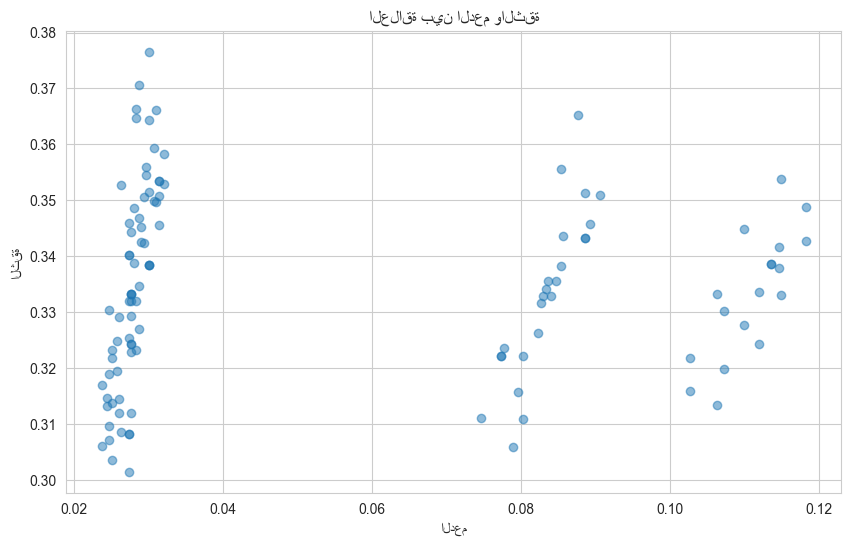

In [8]:
# رسم العلاقة بين الدعم والثقة
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('الدعم')
plt.ylabel('الثقة')
plt.title('العلاقة بين الدعم والثقة')
plt.show()

In [9]:
# عرض أفضل القواعد حسب الرفع
print('أفضل 10 قواعد حسب الرفع:')
rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

أفضل 10 قواعد حسب الرفع:


,antecedents,consequents,support,confidence,lift
92,"(0_Technology, 1_East)",(2_Home Office),0.030000,0.376569,1.121854
93,"(1_East, 2_Home Office)",(0_Technology),0.030000,0.351562,1.102077
110,"(1_West, 2_Home Office)",(0_Technology),0.029333,0.350598,1.099052
105,"(1_West, 2_Consumer)",(0_Technology),0.028667,0.346774,1.087066
23,(1_West),(0_Technology),0.085667,0.343583,1.077062
43,"(0_Furniture, 1_East)",(2_Consumer),0.031000,0.349624,1.075766
80,"(1_South, 0_Office Supplies)",(2_Corporate),0.028333,0.364807,1.075069
54,"(1_South, 2_Consumer)",(0_Furniture),0.028667,0.370690,1.073426
60,"(1_West, 0_Furniture)",(2_Consumer),0.028000,0.348548,1.072455
76,"(1_North, 2_Home Office)",(0_Office Supplies),0.032000,0.358209,1.067157


## حفظ النتائج

In [10]:
# حفظ القواعد في ملف CSV
rules_file = '../results/association_rules.csv'
rules.to_csv(rules_file, index=False)
print(f'تم حفظ القواعد في: {rules_file}')

تم حفظ القواعد في: ../results/association_rules.csv
